In [4]:
from PIL import Image
from skimage.io import imread, imshow, show
# import scipy.fftpack as fp
from scipy import ndimage, misc, signal, stats
# from scipy.stats import signaltonoise
# signaltonoise no longer available
# https://docs.scipy.org/doc/scipy/release.0.16.0.html?highlight=signaltonoise#deprecated-features
from skimage import data, img_as_float
from skimage.color import rgb2gray, rgba2rgb
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft as fp
import timeit

#3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
def plot_image(image, title='', sz=20):
    plt.title(title, size=sz), plt.imshow(image)
    plt.axis(False)

def calculate_2dft(input):
    ft = fp.ifftshift(input)
    ft = fp.fft2(ft)
    return fp.fftshift(ft)

def calculate_2dift(input):
    ift = fp.ifftshift(input)
    ift = fp.ifft2(ift)
    return fp.fftshift(ift).real

def readAsGray(path: str) -> np.ndarray:
    _im = imread(path)
    if len(_im.shape) == 2:
        return _im
    _im = rgba2rgb(_im) if _im.shape[2] > 3 else _im
    _im = rgb2gray(_im)
    return _im

# ĐỀ SỐ 2

## BÀI 1

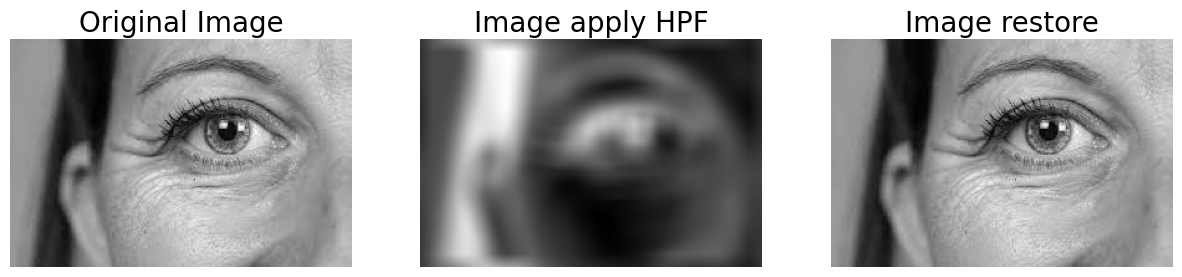

In [19]:
im = readAsGray("../images/eye.jpg")

freq = calculate_2dft(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
l = 10
hpf = np.ones(im.shape)
hpf[half_w-l:half_w+l+1,half_h-l:half_h+l+1] = 0
kernel = calculate_2dift(hpf)
epsilon = 10**-8
ikernel = 1 / (epsilon + kernel)

freq1 = freq * kernel
freq2 = freq1 * ikernel

im1 = np.clip(calculate_2dift(freq1), 0, 255)
im2 = np.clip(calculate_2dift(freq2), 0, 255)

plt.figure(figsize=(15,5)), plt.gray()
plt.subplot(131), plot_image(im, "Original Image")
plt.subplot(132), plot_image(im1, "Image apply HPF")
plt.subplot(133), plot_image(im2, "Image restore")
plt.show()

